**IMPORTING PYTHON LIBRARIES AND GARMENT WORKER PRODUCTIVITY DATASET**

In [47]:
# Data Analysis and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [48]:
# Import Data from GitHub
url = 'https://raw.githubusercontent.com/bagassarendra/MSIB-CapstoneProject/refs/heads/main/garments_worker_productivity.csv'

In [49]:
dataset = pd.read_csv(url)

In [50]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


**CHECKING DATA DIMENSIONS AND STRUCTURE**

In [22]:
dataset.shape

(1197, 15)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [26]:
dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


**CHECKING UNIQUE VALUES**

In [65]:
dataset.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [28]:
print(dataset['department'].unique())

['sweing' 'finishing ' 'finishing']


In [ ]:
dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
print(dataset['department'].unique())

['sweing' 'finishing']


In [32]:
dataset.nunique()

date                      59
quarter                    5
department                 2
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [34]:
print(dataset['quarter'].unique())

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


In [35]:
dataset['quarter'] = dataset['quarter'].str.strip()

In [37]:
dataset['quarter'] = dataset['quarter'].replace('Quarter5', 'Quarter4')

In [38]:
print(dataset['quarter'].unique())

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4']


In [40]:
dataset['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In [41]:
dataset['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

In [42]:
dataset['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: count, dtype: int64

**CHECKING AND HANDLING MISSING VALUES**

In [31]:
dataset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [60]:
dataset[dataset.isnull().any(axis=1)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [61]:
dataset['wip'].fillna(dataset['wip'].median(), inplace=True)

C:\Users\bagas\AppData\Local\Temp\ipykernel_19108\3014423062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['wip'].fillna(dataset['wip'].median(), inplace=True)


In [62]:
dataset.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [63]:
dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [66]:
dataset = dataset.drop(columns=['date'])

In [67]:
dataset.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


**CHECKING AND HANDLING OUTLIERS**

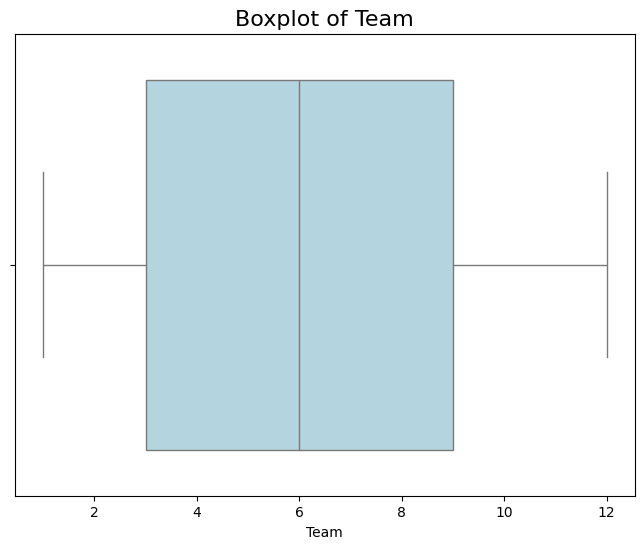

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='team', color='lightblue')
plt.title('Boxplot of Team', fontsize=16)
plt.xlabel('Team')
plt.show()

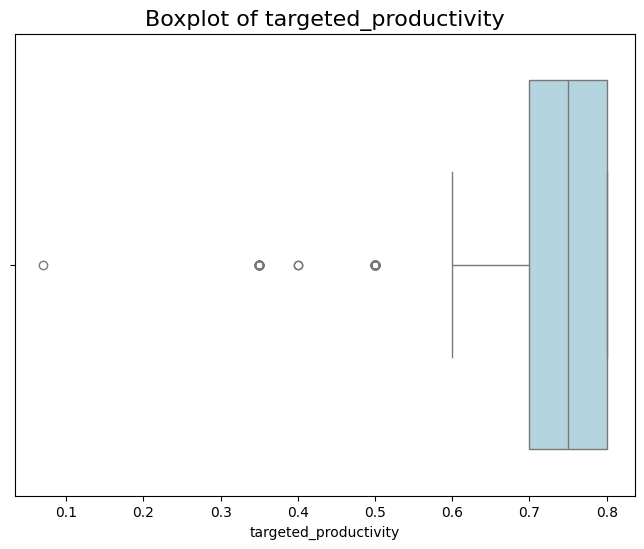

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='targeted_productivity', color='lightblue')
plt.title('Boxplot of targeted_productivity', fontsize=16)
plt.xlabel('targeted_productivity')
plt.show()

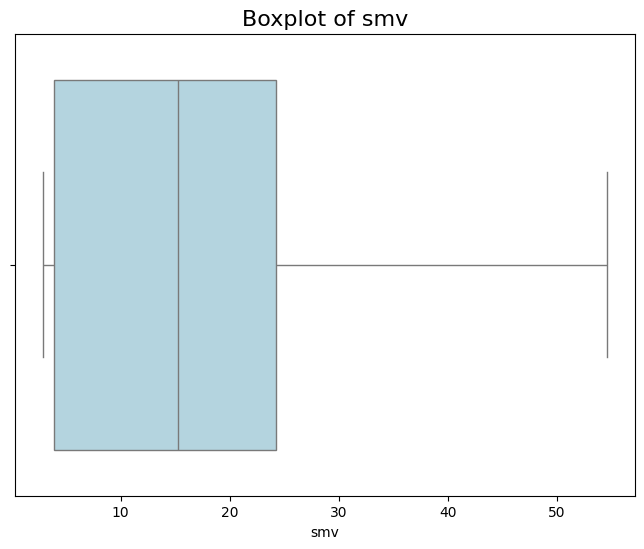

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='smv', color='lightblue')
plt.title('Boxplot of smv', fontsize=16)
plt.xlabel('smv')
plt.show()

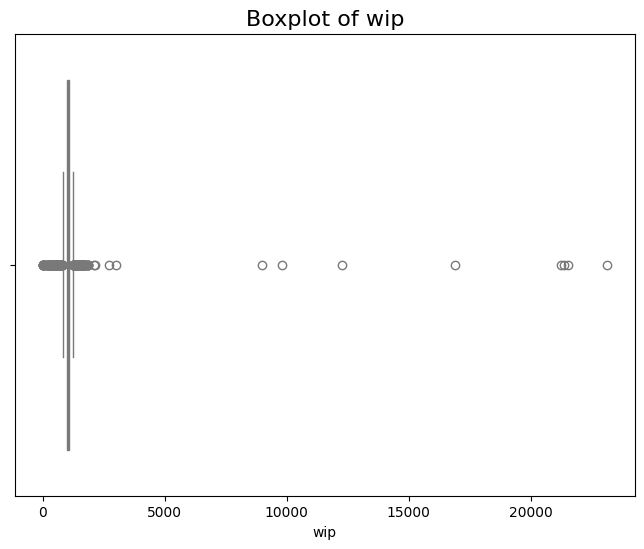

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='wip', color='lightblue')
plt.title('Boxplot of wip', fontsize=16)
plt.xlabel('wip')
plt.show()

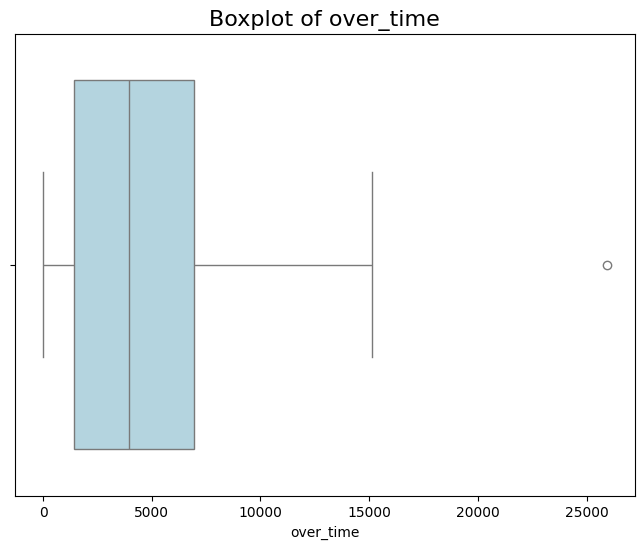

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='over_time', color='lightblue')
plt.title('Boxplot of over_time', fontsize=16)
plt.xlabel('over_time')
plt.show()

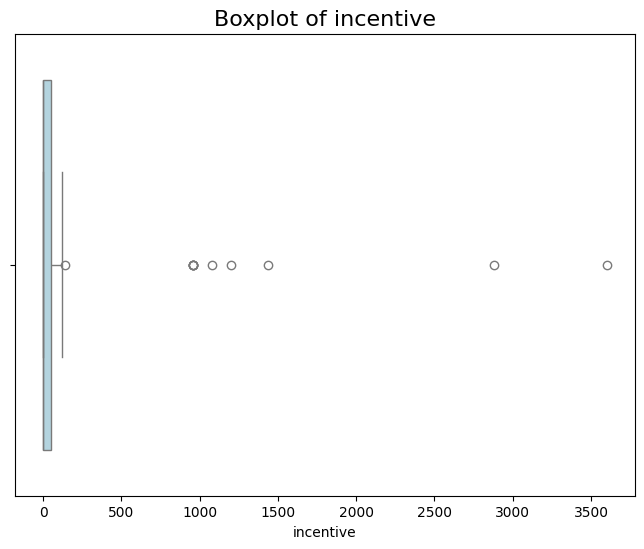

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='incentive', color='lightblue')
plt.title('Boxplot of incentive', fontsize=16)
plt.xlabel('incentive')
plt.show()

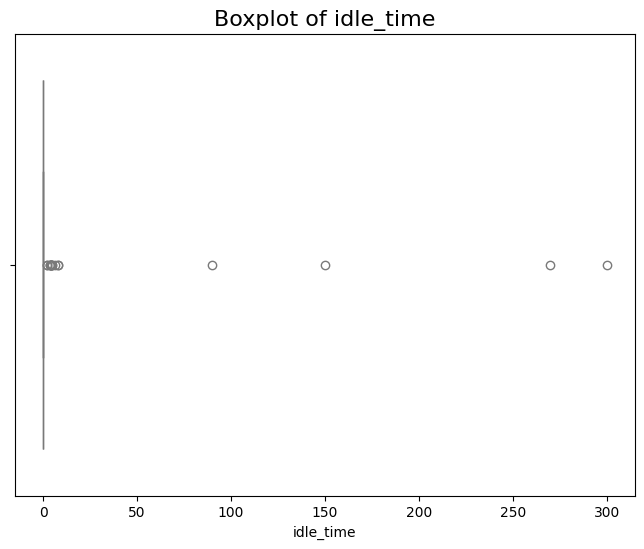

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='idle_time', color='lightblue')
plt.title('Boxplot of idle_time', fontsize=16)
plt.xlabel('idle_time')
plt.show()

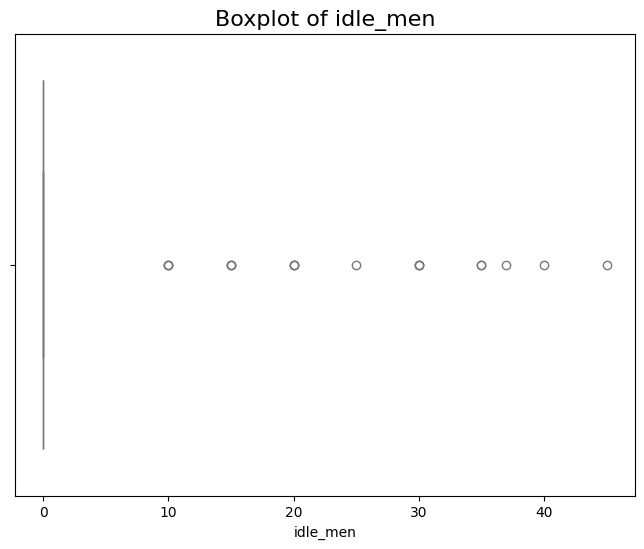

In [81]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='idle_men', color='lightblue')
plt.title('Boxplot of idle_men', fontsize=16)
plt.xlabel('idle_men')
plt.show()

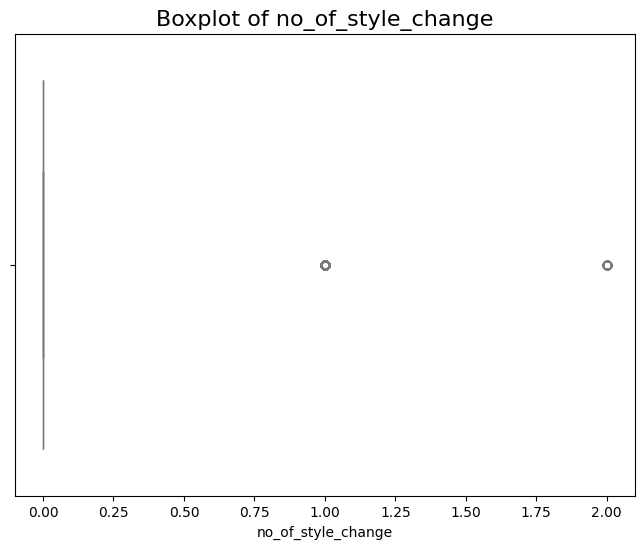

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='no_of_style_change', color='lightblue')
plt.title('Boxplot of no_of_style_change', fontsize=16)
plt.xlabel('no_of_style_change')
plt.show()

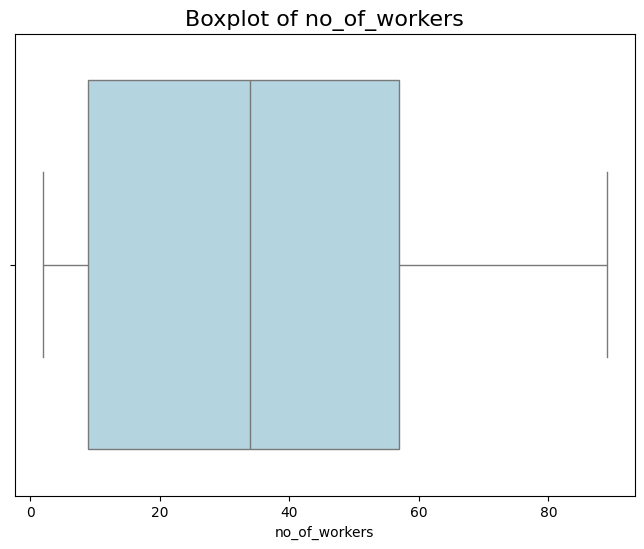

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='no_of_workers', color='lightblue')
plt.title('Boxplot of no_of_workers', fontsize=16)
plt.xlabel('no_of_workers')
plt.show()

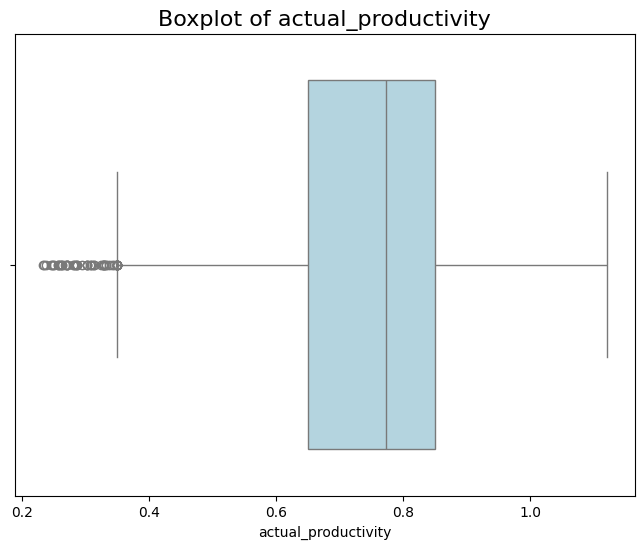

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='actual_productivity', color='lightblue')
plt.title('Boxplot of actual_productivity', fontsize=16)
plt.xlabel('actual_productivity')
plt.show()

In [89]:
def replace_outliers_with_limits(df, column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column_name] = df[column_name].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    
    return df

columns_to_handle = [
    'targeted_productivity',
    'wip',
    'over_time',
    'incentive',
    'idle_time',
    'idle_men',
    'no_of_style_change',
    'actual_productivity'
]

for column in columns_to_handle:
    dataset = replace_outliers_with_limits(dataset, column)

print(dataset[columns_to_handle].head())

   targeted_productivity     wip  over_time  incentive  idle_time  idle_men  \
0                   0.80  1108.0     7080.0       98.0        0.0       0.0   
1                   0.75  1039.0      960.0        0.0        0.0       0.0   
2                   0.80   968.0     3660.0       50.0        0.0       0.0   
3                   0.80   968.0     3660.0       50.0        0.0       0.0   
4                   0.80  1170.0     1920.0       50.0        0.0       0.0   

   no_of_style_change  actual_productivity  
0                 0.0             0.940725  
1                 0.0             0.886500  
2                 0.0             0.800570  
3                 0.0             0.800570  
4                 0.0             0.800382  


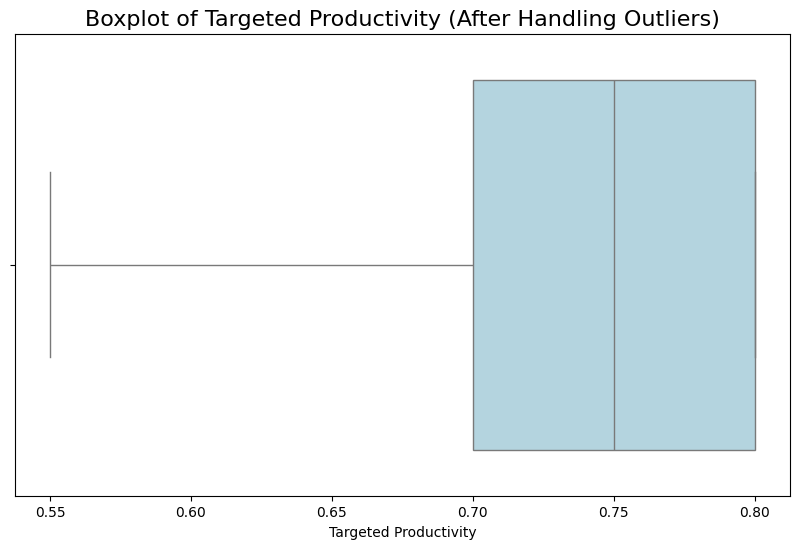

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='targeted_productivity', color='lightblue')
plt.title('Boxplot of Targeted Productivity (After Handling Outliers)', fontsize=16)
plt.xlabel('Targeted Productivity')
plt.show()